Exercise 8: Classifying Supersymmetry
=========================

The [Large Hadron Collider] (LHC) is a machine for smashing high-speed atomic nuclei into
each other.  Each collision is observed by one of the two large detectors (ATLAS and CMS), which are
like huge digital cameras taking snapshots of the particles generated in the
collision. The LHC generates 40,000,000 collision events per second per experiment, and a CMS "photograph" of
one such event is around one MB in size.  Storing every event, let alone analyzing it,
is completely infeasible.

Fortunately, in a hadron collider, as in presentations of vacation pictures, the vast majority
of photographs are "boring", which means no new physics is expected to be observed there.
We will classify those events as **background** and assign to it the label `0`.  The collision events
interesting for our application are classified as **signal** and have the label `1`.  Note that an
event being signal does not mean it contains new physics; it just means it is a collision
where new physics *may* be seen.

One theory for which the LHC is on the lookout is [supersymmetry], or SUSY for short.  We won't 
have time to go into the details: suffice it to say, it is a much-sought-after theory by high-energy 
physicists because if true, it would solve a series of problems with the standard model and greatly
simplify the maths.  However, until now nature has refused to play along and no experimental evidence
of SUSY has been found.

In this exercise you will have to train a model which classifies events as signal or background for
the purposes of SUSY, given 18 hand-picked `variables` observed in each event (the explanations
are given in `variable_names`).  The [dataset] has 5,000,000 events, generated from simulations, together
with their true classification (`labels`).

[Large Hadron Collider]: https://en.wikipedia.org/wiki/Large_Hadron_Collider
[supersymmetry]: https://en.wikipedia.org/wiki/Supersymmetry
[dataset]: https://www.nature.com/articles/ncomms5308

In [38]:
import os
import numpy as np
import matplotlib.pyplot as pl

In [39]:
# Load the dataset from a binary file
with np.load(os.path.expanduser("~/shared/susy.npz")) as _datafile:
    labels = _datafile["labels"].astype(int)
    variables = _datafile["variables"].astype(float)
    variable_names = list(_datafile["variable_names"].astype(str))

In [40]:
variable_names

['lepton 1 pT',
 'lepton 1 eta',
 'lepton 1 phi',
 'lepton 2 pT',
 'lepton 2 eta',
 'lepton 2 phi',
 'missing energy magnitude',
 'missing energy phi',
 'MET_rel',
 'axial MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos(theta_r1)']

In [41]:
variables.shape

(5000000, 18)

In [42]:
labels.shape

(5000000,)

In [43]:
labels[:10]

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

Step 1: Partition the data into a training and a test set
---------------------------------------------------------------------------

Fill variables `X_train`, `y_train` with design matrix and labels
of the training set, and the same for `X_test` and `y_test` for the
test set.

You should put 90% of observations into the training set and 10% into the
test set.

The data has been randomized, so you do not need to do this here
(but can if you like.)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(variables, labels, test_size=0.1, random_state=42)


In [45]:
X_test

array([[ 0.69127971,  1.76920056, -1.71181107, ...,  0.69155955,
         1.50008941,  0.55907702],
       [ 0.41766739, -1.88861191, -0.225399  , ...,  1.3107425 ,
         1.36796749,  0.19139101],
       [ 0.27474409, -1.38396299, -1.03303587, ...,  1.16853487,
         1.5454694 ,  0.00230877],
       ...,
       [ 0.43202895,  1.13463914,  0.82986271, ...,  0.48357216,
         1.46620524,  0.23913801],
       [ 0.75390869, -0.47558346, -0.98757803, ...,  1.08592594,
         1.12514937,  0.0457986 ],
       [ 0.63388175, -0.20484054, -1.40741694, ...,  0.99383885,
         0.55291808,  0.180417  ]])

In [46]:
assert (X_train, y_train, X_test, y_test) is not None
assert X_train.shape[:1] == y_train.shape
assert X_test.shape[:1] == y_test.shape
np.testing.assert_allclose(y_train.size / y_test.size, 9)

Step 2: Train a logistic model
--------------------------------------

Our days of writing all of those fitting things ourselves are now behind us.
We are going to leverage the power of the scikit-learn (`sklearn`) package.
This also means I will step back a little bit and you will have to figure
out more things on your own.

Let us use a `sklearn.linear_model.SGDClassifier` (see the [documentation]),
which is a binary classifier using stochastic gradient descent.

Training with sklearn is two-step procedure:

 1. first, you create a `model`, which encodes both which predictor/classifier
    we are using and how we are going to train it. In our case this is a 
    `SGDClassifier`.   As parameters you should make sure to use the loss function
    for logistic regression and use early stopping.
    
 2. second, we are going to perform the regression on the data set using
    the `fit` method of the model.  Here you should pass the training data.

[documentation]: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [47]:
import sklearn.linear_model

In [48]:
model = sklearn.linear_model.SGDClassifier(early_stopping=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.785724


In [50]:
assert (model,) is not None
assert model.__class__.__name__ == "SGDClassifier"
assert model.score(X_train, y_train) < 1

Step 3: Predict values on the test set and check errors
---------------------------------------------

Now that the model is trained, we can use it to predict values for
the test set, which you should store in `yhat_test`.

Afterwards, compute the in- and out-of-sample error and store it
in `E_in` and `E_out`, respectively.

**Hint**: For both tasks you may have to rummage through the methods of `model` a
little bit or read the documentation.  The error is called "score"
in sklearn terminology.

In [51]:
from sklearn.metrics import accuracy_score

yhat_test = model.predict(X_test)

E_in = 1 - model.score(X_train, y_train)

E_out = 1 - accuracy_score(y_test, yhat_test)

In [52]:
print ("in-sample (training) error:%10.5f" % E_in)
print ("out-of-sample (test) error:%10.5f" % E_out)

in-sample (training) error:   0.21437
out-of-sample (test) error:   0.21428


In [53]:
assert (yhat_test, E_in, E_out) is not None
_am_right = (yhat_test == y_test).sum()
assert _am_right > 350_000, "Poor prediction accuracy" 
assert _am_right < 499_000, "Too good prediction accuracy"
assert 0 < E_in < 1
assert 0 < E_out < 1

Step 4: Evaluate prediction quality
------------------------------

Compute and print/plot the **confusion matrix** (on the test set).

Confusion Matrix:
[[246910  24564]
 [ 82574 145952]]


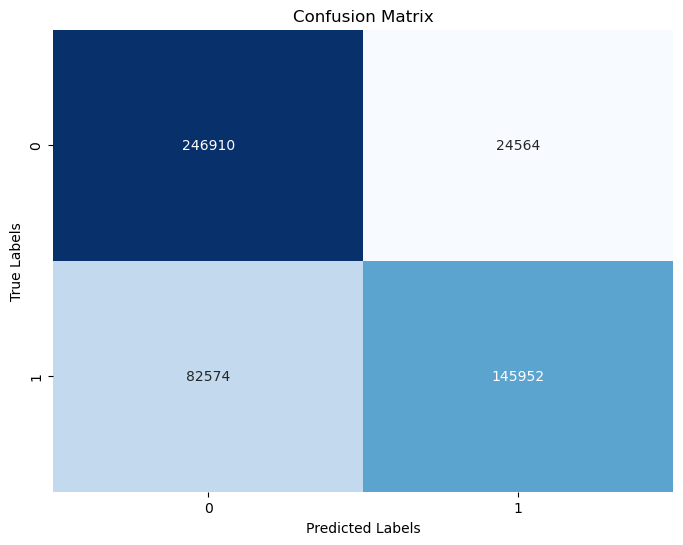

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, yhat_test)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

You should also compute the accuracy, sensitivity, and specificity
and store it in `accuracy`, `sensitivity`, and `specificity`,
respectively and then print those values as well.

In [55]:
from sklearn.metrics import confusion_matrix

accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])

specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Accuracy:", accuracy)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Accuracy: 0.785724
Sensitivity (True Positive Rate): 0.6386669350533418
Specificity (True Negative Rate): 0.9095161967628576


In [56]:
assert 0.5 < accuracy < 0.95
assert 0.5 < sensitivity < 0.95
assert 0.5 < specificity < 0.95
assert sensitivity < specificity


Draw conclusions based on your metrics:

 1. Is the dataset significantly imbalanced?
 
 2. Observe that the sensitivity is smaller than the
    specificity.  What does this mean? 
  
 3. Is this model suitable for finding regions of interest
    for SUSY search in the data? Why or why not?

1. Using the confusion matrix, we see that the dataset is somewhat imbalanced. The class distribution is not equal, asthe number of instances in the negative class (represented by the value 0) is higher than the number of instances in the positive class (represented by the value 1).

2. A sensitivity smaller than specificity suggests that the model is better at correctly identifying the negative class (true negatives) than the positive class (true positives), as is the case here.

3. With an accuracy of 0.83277, the model his good at classifying instances. However, the low sensitivity indicates that the model may not be as effective in detecting positive instances compared to negative instances. 



Step 5: Debugging the model
------------------------------

In an effort to improve the model, one question one can naturally ask is **which**
features are modelled accurately and which features are not.

For this, put all observations of the test design matrix `X_test` which were
predicted incorrectly into `X_fail`, and those which were predicted correctly
into `X_success`.

In [57]:
X_fail = []
X_success = []

for i in range(len(X_test)):
    if yhat_test[i] != y_test[i]:
        X_fail.append(X_test[i])
    else:
        X_success.append(X_test[i])

X_fail = np.array(X_fail)
X_success = np.array(X_success)

In [58]:
assert X_fail.shape[1] == X_test.shape[1]
assert X_fail.shape[0] == (yhat_test != y_test).sum()
assert X_success.shape[1] == X_test.shape[1]
assert X_success.shape[0] == (yhat_test == y_test).sum()


Now let us do a (quite crude!) analysis of where this may go wrong:
If values for feature, say $x_k$, are on average very different in the
training set than in the test set, then we can probably assume that the
dependency on this feature cannot be properly captured by our model.

To study this:

 1. let us first take the **mean** over hits and misses for each feature (mean over 
    the columns of `X_fail` and `X_success`) - let us call this $\bar x^\mathrm{hit}_k$
    and $\bar x^\mathrm{miss}_k$, respectively.
    
 2. to make sure that our "distances" are meaningful, let us also compute
    the **standard deviation** over all observations for each feature (standard
    deviation over the columns of `variables`) - we call this $\sigma_k$.

(Hint: you can use the `mean` and `std` function together with the axis
argument.)

Now plot the $\bar x^\mathrm{hit}_k / \sigma_k$ and $\bar x^\mathrm{miss}_k / \sigma_k$
over $k$. To spot the difference, I suggest plotting these as two lines in 
the same plot.

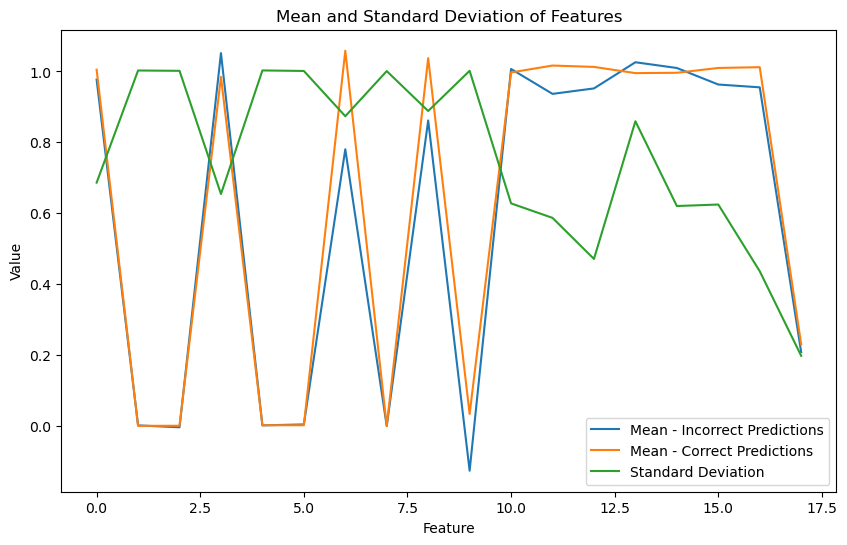

In [59]:
import numpy as np
import matplotlib.pyplot as plt


mean_fail = np.mean(X_fail, axis=0)
mean_success = np.mean(X_success, axis=0)
std_all = np.std(np.concatenate((X_fail, X_success), axis=0), axis=0)

features = range(X_fail.shape[1])

plt.figure(figsize=(10, 6))
plt.plot(features, mean_fail, label='Mean - Incorrect Predictions')
plt.plot(features, mean_success, label='Mean - Correct Predictions')
plt.plot(features, std_all, label='Standard Deviation')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation of Features')
plt.legend()
plt.show()

 1. According to the above plot, which features are most likely involved in poor
    predictions?

 2. How could we modify the design matrix such that we allow the logistic model
    to treat these features (potentially) better?

1. The features where both Mean- Incorrect Predictions and Mean - Correct Predictions very similar with a high standard deviation can mean that the contribution of the feature to the correct classification is low. While a lower standard deviation is a sign of a consistent relationship between feature and target. We see this with feature 3, and the features above 10.

2. Transformation and Scaling can be used to improve the models accuracy by normalizing the data or providing the model with a more linear relationship between features and target. We can also try to remove outliers or select only the relevant features (as dicussed in 1).